In [1]:
pip install textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
from textstat.textstat import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from google.colab import drive

In [3]:
import textstat

In [4]:

from google.colab import files
data_to_load = files.upload()
import io
dataset = pd.read_csv(io.BytesIO(data_to_load['twitter_data.csv']))
     

Saving twitter_data.csv to twitter_data.csv


In [6]:
dataset = pd.read_csv("twitter_data.csv")
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [7]:
# collecting only the tweets from the csv file into a variable name tweet
tweet=dataset.tweet

In [8]:
import nltk

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
dataset["labels"] = dataset["class"]. map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
dataset = dataset[["tweet", "labels"]]
print(dataset. head())

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No Hate and Offensive Speech  
1              Offensive Speech  
2              Offensive Speech  
3              Offensive Speech  
4              Offensive Speech  


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
pip install stopwrds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement stopwrds (from versions: none)
ERROR: No matching distribution found for stopwrds


In [13]:
## 1. Removal of punctuation and capitlization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

stopwords = nltk.corpus.stopwords.words("english")

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ["#ff", "ff", "rt"]
stopwords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(tweet):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # remove whitespace with a single space
    newtweet=punc_remove.str.replace(r'\s+', ' ')
    # remove leading and trailing whitespace
    newtweet=newtweet.str.replace(r'^\s+|\s+?$','')
    # replace normal numbers with numbr
    newtweet=newtweet.str.replace(r'\d+(\.\d+)?','numbr')
    # removal of capitalization
    tweet_lower = newtweet.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopwords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

cleaned_dataset = preprocess(tweet)   

dataset['cleaned_dataset'] = cleaned_dataset
print(dataset[["tweet","cleaned_dataset"]])

                                                   tweet  \
0      !!! RT @mayasolovely: As a woman you shouldn't...   
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
...                                                  ...   
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...   
24779  you've gone and broke the wrong heart baby, an...   
24780  young buck wanna eat!!.. dat nigguh like I ain...   
24781              youu got wild bitches tellin you lies   
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...   

                                         cleaned_dataset  
0      woman complain clean hous amp man alway take t...  
1      boy dat cold tyga dwn bad cuffin dat hoe st place  
2             dawg ever fuck bitch start cri confus shit  
3                                       loo

<ipython-input-13-88cd6e234b37>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cleaned_dataset'] = cleaned_dataset


# **Most Reapetdly used speeches**

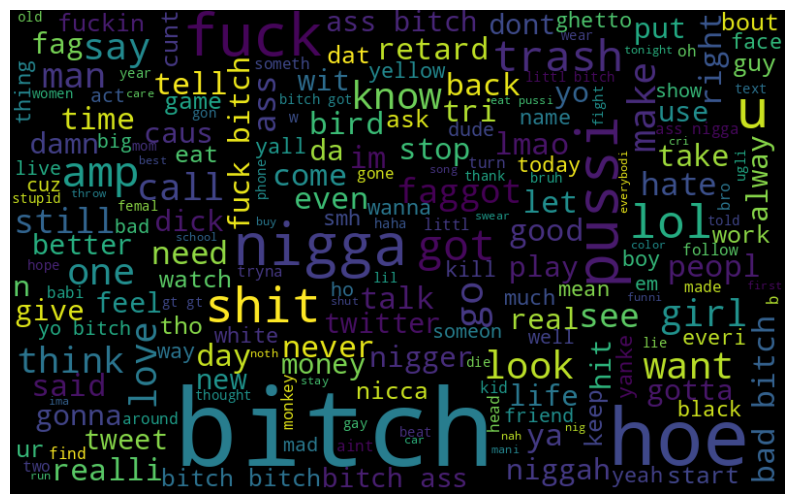

In [14]:
import matplotlib.pyplot as plt
# visualizing which of the word is most commonly used in the dataset
from wordcloud import WordCloud
# imshow-Display data as an image
# interpolation - https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/interpolation_methods.html
all_words = ' '.join([text for text in dataset['cleaned_dataset'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
#random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# New Section

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
# tokenization
tokenized_text = []

# loop through each row in the dataframe and tokenize the text
for index, row in dataset.iterrows():
    text = row['cleaned_dataset'] # assuming the tweet column is named 'tweet'
    words = nltk.word_tokenize(text) # tokenize the text into words
    tokenized_text.append(words) # add the tokenized words to the list

# add the tokenized word as a new column in the dataframe
dataset['tokenized_text'] = tokenized_text
# save the updated dataframe to a new csv file
dataset.to_csv('tokenized_dataset.csv', index=False)
df = pd.read_csv('tokenized_dataset.csv')
# Print the tokenized dataset
for index, row in df.iterrows():
    print(f"Text: {row['cleaned_dataset']}")
   

<ipython-input-16-b25d266b74dd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['tokenized_text'] = tokenized_text


Streaming output truncated to the last 5000 lines.
Text: damn hate bitch like argu shit
Text: nigga realli tri save bitch lol
Text: mother day n min bitch pick kid yo mama hous u hr custodi n instagram p
Text: want crazi bitch loyal af
Text: amp ima eat pussi filthi
Text: hoe annoy
Text: brought bad bitch good weed
Text: damn got bitch kany voic
Text: worri bout bitch caus bitch could somewher suck dick
Text: love love unless pussi got super power
Text: crazi femal cheat wrong everi type hoe guy cheat justif
Text: biggest cunt know
Text: staci mom shit go twitter bitch
Text: annoy im gonna vomit annoy bc littl bitch
Text: bitch act differ buuut cool
Text: bitch spread rumor
Text: hoe like virgin
Text: kim kardashian make million app purchas game call dumb bitch damn gen
Text: mayb nobodi like bitch
Text: stole shit littl niglet
Text: swear yung nigga use wanna heartbreak kid shawn micheal amp razor ramon bitch
Text: stand around ghetto girl
Text: bitch need get life
Text: tall big boot

In [17]:
x = np.array(dataset["tweet"])#input
y = np.array(dataset["labels"])#oucatput
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)# Fit the Data
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)



In [18]:
print("Training set size:", X_train)

Training set size:   (0, 32961)	1
  (0, 3036)	2
  (0, 13019)	1
  (0, 16175)	1
  (0, 2577)	1
  (0, 2765)	1
  (0, 10555)	1
  (0, 13387)	1
  (0, 22427)	1
  (0, 23391)	1
  (0, 14538)	2
  (0, 14612)	1
  (0, 26551)	1
  (1, 35420)	1
  (1, 15717)	1
  (1, 4886)	2
  (1, 3036)	1
  (1, 20483)	1
  (1, 34536)	1
  (1, 22326)	1
  (1, 4448)	1
  (1, 19255)	1
  (1, 23872)	1
  (1, 9058)	1
  (2, 2219)	1
  :	:
  (14867, 14690)	3
  (14867, 7374)	1
  (14868, 30919)	1
  (14868, 15717)	2
  (14868, 4886)	1
  (14868, 3036)	1
  (14868, 31673)	2
  (14868, 4356)	1
  (14868, 20483)	1
  (14868, 17333)	1
  (14868, 6071)	1
  (14868, 22626)	1
  (14868, 21746)	1
  (14868, 27334)	1
  (14868, 2577)	1
  (14868, 27428)	2
  (14868, 13931)	1
  (14868, 13152)	1
  (14868, 14265)	1
  (14868, 30066)	1
  (14868, 19906)	1
  (14868, 6539)	1
  (14868, 21788)	1
  (14868, 574)	1
  (14868, 28486)	1


In [19]:
print("Testing set size:",X_test)

Testing set size:   (0, 4886)	1
  (0, 13463)	1
  (0, 6248)	1
  (0, 35366)	1
  (0, 12447)	1
  (0, 21037)	1
  (0, 1531)	1
  (0, 1457)	1
  (1, 26875)	1
  (1, 35420)	1
  (1, 3959)	1
  (1, 4886)	1
  (1, 12535)	1
  (1, 34536)	1
  (1, 22062)	1
  (1, 21268)	1
  (1, 28959)	1
  (1, 13382)	1
  (1, 19068)	1
  (1, 14807)	1
  (1, 18037)	1
  (2, 26875)	1
  (2, 20052)	1
  (2, 30919)	2
  (2, 12177)	1
  :	:
  (4954, 21746)	1
  (4954, 9944)	1
  (4954, 14536)	1
  (4954, 5084)	1
  (4955, 30864)	1
  (4955, 22331)	1
  (4955, 11555)	1
  (4955, 322)	1
  (4955, 32073)	1
  (4956, 35420)	1
  (4956, 12177)	1
  (4956, 4356)	1
  (4956, 20483)	2
  (4956, 20830)	1
  (4956, 16153)	1
  (4956, 6071)	1
  (4956, 22612)	1
  (4956, 4893)	1
  (4956, 4422)	1
  (4956, 29858)	2
  (4956, 12447)	1
  (4956, 24399)	1
  (4956, 492)	1
  (4956, 11518)	1
  (4956, 22174)	1


In [20]:
print("validation set size:", X_val)

validation set size:   (0, 35420)	1
  (0, 2987)	1
  (0, 28171)	1
  (0, 16153)	1
  (0, 14201)	1
  (0, 9487)	1
  (0, 4448)	1
  (0, 22314)	1
  (0, 3209)	1
  (0, 22341)	1
  (0, 33864)	1
  (0, 5902)	1
  (0, 8826)	1
  (0, 29249)	1
  (0, 22511)	1
  (1, 28171)	1
  (1, 3036)	1
  (1, 4356)	1
  (1, 28079)	1
  (1, 19051)	1
  (1, 17333)	1
  (1, 28860)	1
  (1, 6071)	1
  (1, 30864)	1
  (1, 25254)	1
  :	:
  (4955, 26065)	1
  (4955, 4668)	1
  (4955, 20304)	1
  (4955, 18824)	1
  (4955, 30013)	1
  (4956, 26875)	1
  (4956, 32961)	1
  (4956, 2987)	1
  (4956, 30919)	2
  (4956, 4886)	1
  (4956, 4735)	1
  (4956, 30864)	1
  (4956, 7497)	1
  (4956, 3583)	1
  (4956, 19446)	1
  (4956, 19299)	1
  (4956, 31103)	1
  (4956, 15032)	1
  (4956, 354)	2
  (4956, 27516)	1
  (4956, 27327)	1
  (4956, 25864)	1
  (4956, 6295)	1
  (4956, 18946)	1
  (4956, 23227)	1


In [21]:
X_train

<14869x35852 sparse matrix of type '<class 'numpy.int64'>'
	with 193514 stored elements in Compressed Sparse Row format>

In [22]:
y_train

array(['Offensive Speech', 'Offensive Speech', 'Offensive Speech', ...,
       'Offensive Speech', 'No Hate and Offensive Speech',
       'Offensive Speech'], dtype=object)

In [23]:
X_test

<4957x35852 sparse matrix of type '<class 'numpy.int64'>'
	with 64586 stored elements in Compressed Sparse Row format>

In [24]:
y_test

array(['Offensive Speech', 'Offensive Speech',
       'No Hate and Offensive Speech', ..., 'Offensive Speech',
       'Offensive Speech', 'Offensive Speech'], dtype=object)

In [25]:
X_val

<4957x35852 sparse matrix of type '<class 'numpy.int64'>'
	with 65958 stored elements in Compressed Sparse Row format>

In [26]:
from sklearn.metrics import classification_report
#model.score(X_test,y_test)
# Define hyperparameters
max_depths = [10000,11000,3000] # maximum depth of the tree ,02,5,9,4,6,100,1000
min_samples_splits = [400,4000,100] # minimum number of samples required to split an internal node 2,89,90,34,45,65,254
min_samples_leaves = [2,5,3] # minimum number of samples required to be at a leaf node 890,2001,2400,67,544,560,679,
# Train the model with different hyperparameters
for max_depth in max_depths:
    for min_samples_split in min_samples_splits:
        for min_samples_leaf in min_samples_leaves:
            # Define the model
            model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,criterion='gini')
            # Train the model
            model.fit(X_train, y_train)
           #train and test
            score = (model.score(X_test, y_test)*100)
           
            # Print the results
            print(f"Max depth: {max_depth}, Min samples split: {min_samples_split}, Min samples leaf: {min_samples_leaf}, Accuracy score: {score}")


Max depth: 10000, Min samples split: 400, Min samples leaf: 2, Accuracy score: 89.77203954004437
Max depth: 10000, Min samples split: 400, Min samples leaf: 5, Accuracy score: 90.41759128505144
Max depth: 10000, Min samples split: 400, Min samples leaf: 3, Accuracy score: 90.43776477708292
Max depth: 10000, Min samples split: 4000, Min samples leaf: 2, Accuracy score: 85.83820859390761
Max depth: 10000, Min samples split: 4000, Min samples leaf: 5, Accuracy score: 86.08029049828525
Max depth: 10000, Min samples split: 4000, Min samples leaf: 3, Accuracy score: 86.10046399031673
Max depth: 10000, Min samples split: 100, Min samples leaf: 2, Accuracy score: 89.24752874722614
Max depth: 10000, Min samples split: 100, Min samples leaf: 5, Accuracy score: 90.25620334879967
Max depth: 10000, Min samples split: 100, Min samples leaf: 3, Accuracy score: 90.05446842848497
Max depth: 11000, Min samples split: 400, Min samples leaf: 2, Accuracy score: 89.73169255598144
Max depth: 11000, Min sampl

Evaluation of Mode


In [27]:

            y_preed = model.predict(X_test)
            # Evaluate the model's performance
            report = classification_report(y_test, y_preed)
            print(report)

                              precision    recall  f1-score   support

                 Hate Speech       0.43      0.23      0.30       290
No Hate and Offensive Speech       0.83      0.92      0.87       835
            Offensive Speech       0.94      0.95      0.94      3832

                    accuracy                           0.90      4957
                   macro avg       0.73      0.70      0.70      4957
                weighted avg       0.89      0.90      0.89      4957



# **Decision Tree Validation Confusion Matrix**

**Corss Validation**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
# Define the number of folds for cross-validation
k_folds = KFold(n_splits=30)

# Evaluate the model using cross-validation
scores = cross_val_score(model,X_train, y_train, cv=k_folds)

# Print the average score and standard deviation across all folds
print("Average score: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))


Average score: 0.90 (+/- 0.01)


In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3000,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Predicting the outcome 

In [31]:
!pip install SpeechRecognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 22.8 MB/s eta 0:00:00


In [40]:
#import library
import speech_recognition as sr
#Initiаlize  reсоgnizer  сlаss  (fоr  reсоgnizing  the  sрeeсh)
r = sr.Recognizer()
# Reading Audio file as source
#  listening  the  аudiо  file  аnd  stоre  in  аudiо_text  vаriаble
aud="/content/hatewav.wav"
with sr.AudioFile(aud) as source:
    audio_text = r.listen(source)
# recoginize_() method will throw a request error if the API is unreachable, hence using exception handling
    try:
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print('Converting audio transcripts into text ...')
        print('done!')
    except:
         print('Sorry.. run again...')

Converting audio transcripts into text ...
done!


In [37]:
#Predicting the outcome
#inp =input("Enter the input post : ======>")
dp = cv.transform([text]).toarray()
dt=model.predict(dp)
if dt=='Hate Speech':
    print("///////////////////////////////") 
    print("/////the post is blocked//////")
    print("//////////////////////////////")
elif dt=='Offensive Speech':
    print("Warnnig.....")
    print("Warnnig.....")
    print("Warnnig.....")
    print(text)

else:
    print(text)
   
print(dt)

///////////////////////////////
/////the post is blocked//////
//////////////////////////////
['Hate Speech']
